In [59]:
%config InlineBackend.figure_format = 'svg' # change output plot display format to 'svg'

# import the required modules for this notebook
import numpy as np
import matplotlib.pyplot as plt

# import the helper functions from the parent directory,
# these help with things like graph plotting and notebook layout
import sys
sys.path.append('..')
from helper_functions import *

# set things like fonts etc - comes from helper_functions
set_notebook_preferences()

# add a show/hide code button - also from helper_functions
toggle_code(title = "setup code")

# Drawing samples from a gaussian

Suppose we draw a random vector from a 2D gaussian distribution

$$ \mathbf{y} \sim \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma}),~\boldsymbol{\mu} = \begin{pmatrix}
2 \\
2 \\
\end{pmatrix}, \boldsymbol{\Sigma} = \begin{pmatrix}
2 & 1\\
1 & 2\\
\end{pmatrix}$$

and plot its entries against their index, as shown bellow. The left plot shows a contour plot of the distribution and also the sampled vector $(y_1, y_2)$. On the right plot, we've taken the two vector components $y_1$ and $y_2$ and plotted them against their index $d = 1, 2$. The reason for adopting this representation will become apparent shortly. You can try rerunning the code to see the different samples.

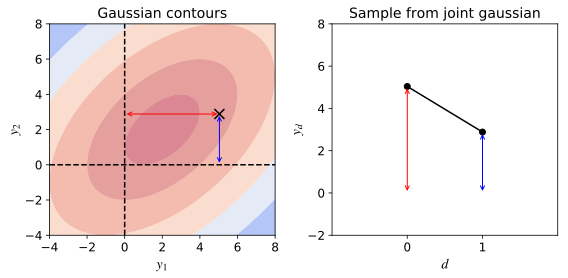

In [2]:
indices = np.array([0, 1]) # indices of points
mean = np.array([2, 2]) # mean of multivariate normal
cov = np.array([[2, 1], [1, 2]]) # arbitrary covariance matrix
y = np.random.multivariate_normal(mean, cov) # draw y from multivariate normal

# plotting code - understanding this is uncecessary
plt.figure(figsize = (8, 4))
plt.subplot(121)
grid = np.stack(np.meshgrid(np.linspace(-4, 8, 50), np.linspace(-4, 8, 60)), axis = 2)
contour_plot = -(0.5*(grid - mean).dot(np.linalg.inv(cov))*(grid - mean)).sum(axis = 2)
plt.contourf(np.linspace(-4, 8, 50), np.linspace(-4, 8, 60), contour_plot, cmap = 'coolwarm',
             alpha = 0.5, levels = -np.linspace(6, 0, 7)**2)
plt.annotate(s='', xy=(y[0], y[1]), xytext=(0, y[1]),
             arrowprops=dict(arrowstyle='<->', color='red'))
plt.annotate(s='', xy=(y[0], y[1]), xytext=(y[0], 0),
             arrowprops=dict(arrowstyle='<->', color='blue'))
plt.plot([-4, 8], [0, 0], '--', color = 'black')
plt.plot([0, 0], [-4, 8], '--', color = 'black')
plt.scatter(y[0], y[1], marker = 'x', s = 100, c = 'black', zorder = 2)
beautify_plot({'title': 'Gaussian contours', 'x':'$y_1$', 'y': '$y_2$'})

plt.subplot(122)
plt.annotate(s='', xy=(0, 0), xytext=(0, y[0]),
             arrowprops=dict(arrowstyle='<->', color='red'))
plt.annotate(s='', xy=(1, 0), xytext=(1, y[1]),
             arrowprops=dict(arrowstyle='<->', color='blue'))
plt.scatter(indices, y, c = 'black', zorder = 2)
plt.plot(indices, y, 'black')
plt.xlim([-1, 2])
plt.ylim([-2, 6])
plt.yticks(np.arange(-2, 9, 2))
plt.xticks(indices)
beautify_plot({'title': 'Sample from joint gaussian', 'x':'$d$',
               'y': '$y_d$'})
plt.tight_layout()
plt.show()

toggle_code()

We can also take several samples at once and look at them in either representation. You can change the mean vector and the covariance matrix and see how the samples change. Remember: the covariance matrix must be positive-definite, i.e. all its eigenvalues must be strictly positive - why is this the case?

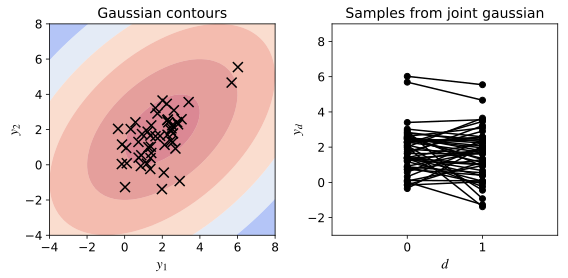

In [3]:
indices = np.array([0, 1]) # indices of points
mean = np.array([2, 2]) # mean of multivariate normal
cov = np.array([[2, 1], [1, 2]]) # arbitrary covariance matrix

# plotting code - understanding this is uncecessary
plt.figure(figsize = (8, 4))

plt.subplot(121)
grid = np.stack(np.meshgrid(np.linspace(-4, 8, 50), np.linspace(-4, 8, 60)), axis = 2)
contour_plot = -(0.5*(grid - mean).dot(np.linalg.inv(cov))*(grid - mean)).sum(axis = 2)
plt.contourf(np.linspace(-4, 8, 50), np.linspace(-4, 8, 60), contour_plot, cmap = 'coolwarm',
             alpha = 0.5, levels = -np.linspace(6, 0, 7)**2)
beautify_plot({'title': 'Gaussian contours', 'x':'$y_1$', 'y': '$y_2$'})

plt.subplot(122)
plt.xlim([-1, 2])
plt.ylim([-3, 9])
beautify_plot({'title': 'Samples from joint gaussian', 'x':'$d$',
               'y': '$y_d$'})

for i in range(50):
    samples = np.random.multivariate_normal(mean, cov) # draw samples from multivariate normal
    
    plt.subplot(121)
    plt.scatter(samples[0], samples[1], marker = 'x', s = 100, c = 'black', zorder = 2)
    
    plt.subplot(122)
    plt.scatter(indices, samples, c = 'black', zorder = 2)
    plt.plot(indices, samples, 'black')

plt.yticks(np.arange(-2, 9, 2))
plt.xticks(indices)
plt.tight_layout()
plt.show()

toggle_code()

Now, if we fix the value of $y_1$, the conditional distribution $p(y_2\vert y_1)$ is also gaussian. In general, if $\mathbf{y}$ is a gaussian-distributed vector and vectors $\mathbf{y}_1$, $\mathbf{y}_2$ partition it, in the sense of

$$ \mathbf{y} \sim \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma}),~\mathbf{y} = \begin{pmatrix}
\mathbf{y}_1 \\
\mathbf{y}_2 \\
\end{pmatrix},~\boldsymbol{\mu} = \begin{pmatrix}
\boldsymbol{\mu}_1 \\
\boldsymbol{\mu}_2 \\
\end{pmatrix}, \boldsymbol{\Sigma} = \begin{pmatrix}
\boldsymbol{\Sigma}_{11} & \boldsymbol{\Sigma}_{12}\\
\boldsymbol{\Sigma}_{21} & \boldsymbol{\Sigma}_{22}\\
\end{pmatrix},$$

then the conditional distribution $p(\mathbf{y}_2 \vert \mathbf{y}_1)$ is:

$$ p(\mathbf{y}_2 \vert \mathbf{y}_1) = \mathcal{N}(\boldsymbol{\mu}_{\mathbf{y}_2\vert\mathbf{y}_1}, \boldsymbol{\Sigma}_{\mathbf{y}_2\vert\mathbf{y}_1})$$

$$\begin{align}
\boldsymbol{\mu}_{\mathbf{y}_2\vert\mathbf{y}_1} &= \boldsymbol{\mu}_2 + \boldsymbol{\Lambda}_{22}^{-1}\boldsymbol{\Lambda}_{21}(\mathbf{y}_1 - \boldsymbol{\mu}_1) \\
\boldsymbol{\Sigma}_{\mathbf{y}_2\vert\mathbf{y}_1} &= \boldsymbol{\Lambda}_{22}^{-1}
\end{align}$$

We prove this below but you are encouraged to try and derive it on your own before you take a look at the solution.

<details>
<summary>Derivation for the conditional of a gaussian</summary>
<div>
    From the product rule:
    $$ p(\mathbf{y}_2 \vert \mathbf{y}_1) = \frac{p(\mathbf{y}_2, \mathbf{y}_1)}{p(\mathbf{y}_1)} $$
    Noting that $\mathbf{y}_1$ is a given vector so $p(\mathbf{y}_1)$ is simply a fixed number and also noting that $p(\mathbf{y}_2, \mathbf{y}_1)$ is a gaussian, it follows that $p(\mathbf{y}_2 \vert \mathbf{y}_1)$ is also a gaussian. Therefore the mean and covariance of the conditional, are sufficient statistics for the conditional (i.e. enough to determine the distribution). To calculate these, let's write out the joint:
    
    \begin{align} p(\mathbf{y}_1, \mathbf{y}_2) \propto \exp \bigg( &-\frac{1}{2}(\mathbf{y}_1 - \boldsymbol{\mu}_1)^\top \boldsymbol{\Lambda}_{11} (\mathbf{y}_1 - \boldsymbol{\mu}_1) -\frac{1}{2}(\mathbf{y}_1 - \boldsymbol{\mu}_1)^\top \boldsymbol{\Lambda}_{12} (\mathbf{y}_2 - \boldsymbol{\mu}_2)\\
    &-\frac{1}{2}(\mathbf{y}_2 - \boldsymbol{\mu}_2)^\top \boldsymbol{\Lambda}_{21}(\mathbf{y}_1 - \boldsymbol{\mu}_1) -\frac{1}{2}(\mathbf{y}_2 - \boldsymbol{\mu}_2)^\top \boldsymbol{\Lambda}_{22}(\mathbf{y}_2 - \boldsymbol{\mu}_2)  \bigg)
    \end{align}
    
    up to a normalising constant. Since $p(\mathbf{y}_2 \vert \mathbf{y}_1)$ is gaussian, we can write it out as
    
    $$ p(\mathbf{y}_2 \vert \mathbf{y}_1) = \mathcal{N}(\boldsymbol{\mu}_{\mathbf{y}_2\vert\mathbf{y}_1}, \boldsymbol{\Sigma}_{\mathbf{y}_2\vert\mathbf{y}_1}) \propto \exp \bigg( -\frac{1}{2}(\mathbf{y}_2 - \boldsymbol{\mu}_{\mathbf{y}_2 \vert \mathbf{y}_1})^\top\boldsymbol{\Sigma}_{\mathbf{y}_2\vert\mathbf{y}_1}^{-1}(\mathbf{y}_2 - \boldsymbol{\mu}_{\mathbf{y}_2 \vert \mathbf{y}_1}) \bigg).$$
    
    and obtain the mean and covariance by comparing terms. Equating the terms quadratic in $\mathbf{y}_2$:
    
    $$ \mathbf{y}_2^\top\boldsymbol{\Sigma}_{\mathbf{y}_2\vert\mathbf{y}_1}^{-1}\mathbf{y}_2 = \mathbf{y}_2^\top\boldsymbol{\Lambda}_{22}\mathbf{y}_2 \implies \boldsymbol{\Sigma}_{\mathbf{y}_2\vert\mathbf{y}_1} = \boldsymbol{\Lambda}_{22}^{-1}$$
    
    Equating the terms linear in $\mathbf{y}_2$:
    
    $$\mathbf{y}_2^\top\boldsymbol{\Sigma}_{\mathbf{y}_2\vert\mathbf{y}_1}^{-1}\boldsymbol{\mu}_{\mathbf{y}_2\vert\mathbf{y}_1} = \mathbf{y}_2^\top \boldsymbol{\Lambda}_{22}\boldsymbol{\mu}_2 + \mathbf{y}_2^\top \boldsymbol{\Lambda}_{21}(\mathbf{y}_1 - \boldsymbol{\mu}_1) \implies \boldsymbol{\mu}_{\mathbf{y}_2\vert\mathbf{y}_1} = \boldsymbol{\mu}_2 + \boldsymbol{\Lambda}_{22}^{-1}\boldsymbol{\Lambda}_{21}(\mathbf{y}_1 - \boldsymbol{\mu}_1)$$
    
    obtaining the mean and covariance we advertised at the start.
</div>
</details>

With these expressions, we can sample $y_2$ given $y_1 = 3$ in our 2-dimensional example. Try tweaking the value of `y1` and observe the changes.

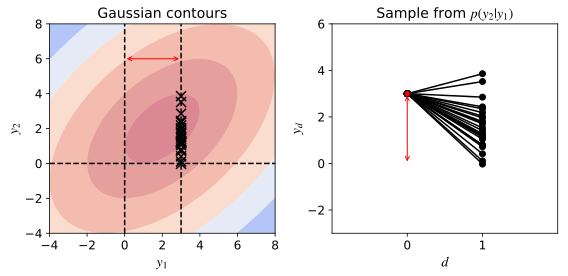

In [4]:
indices = np.array([0, 1]) # indices of points
mean = np.array([2, 2]) # mean of multivariate normal
cov = np.array([[2, 1], [1, 2]]) # arbitrary covariance matrix
prec = np.linalg.inv(cov) # corresponding precision matrix
y1 = 3 # suppose we fix y2 = 3 (play with this and look at the changes)

# calculate mean and covariance of conditional
mean_cond = mean[:1] + np.linalg.inv(prec[1:, 1:]).dot(prec[:1, 1:]).dot(y1 - mean[1:])
cov_cond = np.linalg.inv(prec[1:, 1:])

# plotting code - understanding this is uncecessary
plt.figure(figsize = (8, 4))

plt.subplot(121)
grid = np.stack(np.meshgrid(np.linspace(-4, 8, 50), np.linspace(-4, 8, 60)), axis = 2)
contour_plot = -(0.5*(grid - mean).dot(np.linalg.inv(cov))*(grid - mean)).sum(axis = 2)
plt.contourf(np.linspace(-4, 8, 50), np.linspace(-4, 8, 60), contour_plot, cmap = 'coolwarm',
             alpha = 0.5, levels = -np.linspace(6, 0, 7)**2)
plt.annotate(s='', xy=(0, 6), xytext=(y1,6), arrowprops=dict(arrowstyle='<->', color='red'))
plt.plot([y1, y1], [-4, 8], '--', color = 'black')
plt.plot([-4, 8], [0, 0], '--', color = 'black')
plt.plot([0, 0], [-4, 8], '--', color = 'black')
beautify_plot({'title': 'Gaussian contours', 'x':'$y_1$', 'y': '$y_2$'})

plt.subplot(122)
plt.xlim([-1, 2])
plt.ylim([-3, 6])
beautify_plot({'title': 'Sample from $p(y_2|y_1)$', 'x':'$d$',
               'y': '$y_d$'})

for i in range(25):
    y2 = np.random.multivariate_normal(mean_cond, cov_cond)
    
    plt.subplot(121)
    plt.scatter(y1, y2, marker = 'x', s = 100, c = 'black', zorder = 2)
    
    plt.subplot(122)
    plt.scatter(0, y1, color = 'red', linewidth = 1,
                edgecolor = 'black', zorder = 3)
    plt.scatter(1, y2, c = 'black', zorder = 2)
    plt.plot([0, 1], [y1, y2], 'black')

plt.annotate(s='', xy=(0, 0), xytext=(0,y1), arrowprops=dict(arrowstyle='<->', color='red'))
plt.yticks(np.arange(-2, 7, 2))
plt.xticks(indices)
plt.tight_layout()
plt.show()

toggle_code()

The reason for using a 2-dimensional gaussian up to now was to be able to visualise it, but we can repeat the same sampling process using more dimensions. Consider the following 10-dimensional covariance matrix:

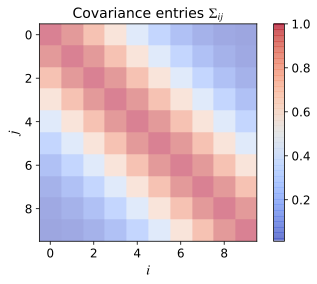

In [5]:
indices = np.arange(0, 10)
cov = magic_covariance(indices, scale = 3)

np.random.multivariate_normal(np.zeros(shape = indices.shape), cov)
plt.imshow(cov, cmap = 'coolwarm', alpha = 0.5)
plt.xticks(np.arange(0, 10, 2))
plt.yticks(np.arange(0, 10, 2))
beautify_plot({'title': 'Covariance entries $\Sigma_{ij}$', 'x':'$i$', 'y': '$j$'})
plt.colorbar()
plt.show()

toggle_code()

We pull this matrix out of a hat, without giving any explanation of how it was constructed. We'll explain this later, but for the moment note its rough struture: $y$'s which have similar index values $i \approx j$ have been given a high covariance whereas ones with significantly different indices $i \not\approx j$ have been given a low covariance. Let's go ahead with our original goal of making some samples. Try rerunning the code to get a feel for the samples we can obtain.

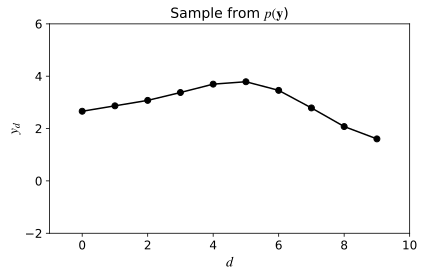

In [29]:
indices = np.arange(0, 10)
mean = np.ones_like(indices)*2 # mean of multivariate normal
cov = magic_covariance(indices, scale = 3, sigma = 2) # get the magic covariance matrix
samples = np.random.multivariate_normal(mean, cov) # draw samples from multivariate normal

# plotting code - understanding this is uncecessary
plt.figure(figsize = (6, 4))
plt.scatter(indices, samples, c = 'black', zorder = 2)
plt.plot(indices, samples, 'black')
plt.xlim([-1, 10])
plt.ylim([-1, 6])
plt.yticks(np.arange(-2, 7, 2))
beautify_plot({'title': 'Sample from $p(\mathbf{y}$)', 'x':'$d$', 'y': '$y_d$'})
plt.tight_layout()
plt.show()

toggle_code()

Note how for a single sample, entries with similar indices $i \approx j$ typically have values which are close to each other, whereas indices which are far appart have are typically less strongly correlated. This is of course a consequence of the structure of the covariance matrix. As before, we can fix certain values of $\mathbf{y}$ and sample the rest, i.e. $\mathbf{y}_2 \sim p(\mathbf{y}_2 \vert \mathbf{y}_1)$. We already derived the formulae for this:

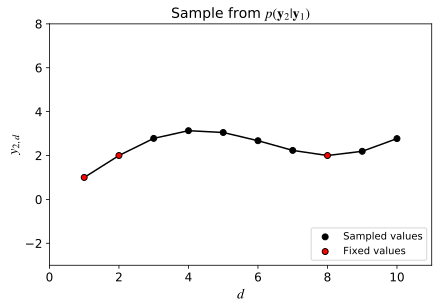

In [16]:
indices = np.arange(0, 10)
sample_idx = np.array([2, 3, 4, 5, 6, 8, 9])
fixed_idx = np.array([0, 1, 7])
cov = magic_covariance(indices, scale = 3, sigma = 2) # get the magic covariance index
prec = np.linalg.inv(cov) # calculate precision from covariance

y_given = np.array([[1, 2, 2]]).T # values of y_1, y_2 and y_8 to condition on
prec_22 = np.delete(np.delete(prec, obj = fixed_idx, axis = 0), obj = fixed_idx, axis = 1)
prec_21 = np.delete(np.delete(prec, obj = fixed_idx, axis = 0), obj = sample_idx, axis = 1)
mean = 2 - np.linalg.inv(prec_22).dot(prec_21.dot(y_given - 2)) # conditional mean

# draw samples from condtional
samples = np.random.multivariate_normal(mean.reshape(-1), np.linalg.inv(prec_22))

# plotting code - understanding this is uncecessary
plt.figure(figsize = (6, 4))

plt.scatter(sample_idx + 1, samples, c = 'black', zorder = 2, label = 'Sampled values')
plt.scatter(fixed_idx + 1, y_given, color = 'red', linewidth = 1,
            edgecolor = 'black', zorder = 3, label = 'Fixed values')

all_values = np.zeros(shape = (len(sample_idx) + len(fixed_idx),))
all_values[sample_idx] = samples
all_values[fixed_idx] = y_given[:, 0]
plt.plot(np.arange(1, len(all_values) + 1), all_values, 'black')

plt.xlim([0, 11])
plt.ylim([-3, 8])
plt.tight_layout()
plt.gca().legend(loc = 4)
beautify_plot({'title': 'Sample from $p(\mathbf{y}_2 | \mathbf{y}_1)$',
               'x':'$d$', 'y': '$y_{2,d}$'})
plt.show()

toggle_code()

We can repeat this sampling many times to obtain something like:

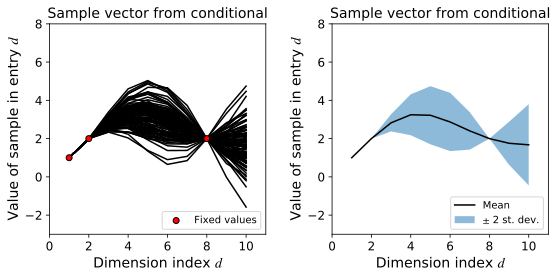

In [9]:
indices = np.arange(0, 10)
sample_idx = np.array([2, 3, 4, 5, 6, 8, 9])
fixed_idx = np.array([0, 1, 7])
cov = magic_covariance(indices, scale=3, sigma=2) # get the magic covariance index
prec = np.linalg.inv(cov) # calculate precision from covariance

y_given = np.array([[1, 2, 2]]).T # values of y_1, y_2 and y_8 to condition on
# precision 22 and 21 matrices obtained by deleting the appropriate rows/columns of prec
prec_22 = np.delete(np.delete(prec, obj=fixed_idx, axis = 0), obj=fixed_idx, axis=1)
prec_21 = np.delete(np.delete(prec, obj=fixed_idx, axis = 0), obj=sample_idx, axis=1)
mean = 2 - np.linalg.inv(prec_22).dot(prec_21.dot(y_given - 2)) # conditional dist. mean

samples, no_samples = [], 100
for i in range(no_samples):
    sample = np.random.multivariate_normal(mean.reshape(-1), np.linalg.inv(prec_22))
    samples.append(sample)
    
    
# plotting code - understanding this is uncecessary
plt.figure(figsize = (8, 4))

plt.subplot(121)
plt.scatter(fixed_idx + 1, y_given, color='red', linewidth=1,
            edgecolor='black', zorder=3, label='Fixed values')

all_values = []
for i in range(no_samples):
    sample = samples[i]
    all_values_ = np.zeros(shape=(len(sample_idx) + len(fixed_idx),))
    all_values_[sample_idx] = sample
    all_values_[fixed_idx] = y_given[:, 0]
    all_values.append(all_values_)
    
    plt.plot(np.arange(1, len(all_values_) + 1), all_values_, 'black')
    
all_values = np.array(all_values)
    
plt.xlim([0, 11])
plt.ylim([-3, 8])
plt.gca().legend(loc=4)
beautify_plot({'title': 'Sample vector from conditional',
               'x':'Dimension index $d$',
               'y': 'Value of sample in entry $d$'})

plt.subplot(122)

means = all_values.mean(axis=0)
stds = all_values.var(axis=0)**0.5
plt.plot(np.arange(1, all_values.shape[1] + 1), means, color='black', label='Mean')
plt.fill_between(np.arange(1, all_values.shape[1] + 1), means - 2*stds, means + 2*stds,
                 label=r'$\pm $ 2 st. dev.', alpha = 0.5)
plt.gca().legend(loc=4)
plt.xlim([0, 11])
plt.ylim([-3, 8])
beautify_plot({'title': 'Sample vector from conditional',
               'x':'Dimension index $d$',
               'y': 'Value of sample in entry $d$'})

plt.tight_layout()
plt.show()

toggle_code()

Of course, *we don't have to take all those samples* to figure out the mean and variance of each vector entry, because we already have

$$\begin{align}
\boldsymbol{\mu}_{\mathbf{y}_2\vert\mathbf{y}_1} &= \boldsymbol{\mu}_2 + \boldsymbol{\Lambda}_{22}^{-1}\boldsymbol{\Lambda}_{21}(\mathbf{y}_1 - \boldsymbol{\mu}_1) \\
\boldsymbol{\Sigma}_{\mathbf{y}_2\vert\mathbf{y}_1} &= \boldsymbol{\Lambda}_{22}^{-1}
\end{align}$$

and if we want to know the mean/variance of $(\mathbf{y}_{2})_d = \mathbf{y}_{2,d}$, we can integrate out all other entries:

$$ p(\mathbf{y}_{2,d}\vert\mathbf{y}_1) = \int p(\mathbf{y}_2\vert\mathbf{y}_1) d\mathbf{y}_{2,i\neq d}$$

where $\int ~ \cdot~ d\mathbf{y}_{2,i\neq d}$ means integrating out w.r.t. all elements of $\mathbf{y}_2$ except $d$. Since the marginal of a gaussian is gaussian, $p(\mathbf{y}_{2,d}\vert\mathbf{y}_1)$ will also be gaussian with mean $(\boldsymbol{\mu}_{\mathbf{y}_2\vert\mathbf{y}_1})_d$ and precision $\big(\boldsymbol{\Lambda}_{22}\big)_{dd}$ - you are encouraged to derive this on your own. The predicted mean $\boldsymbol{\mu}_{\mathbf{y}_2\vert\mathbf{y}_1}$ depends on our choice of covariance matrix $\boldsymbol{\Sigma}$, which we have postponed explaining up to now, through the term $\boldsymbol{\Lambda}_{22}^{-1}\boldsymbol{\Lambda}_{21}$. The function used to calculate each entry of the covariance matrix above was:

$$\begin{align}
\boldsymbol{\Sigma}_{ij} = \sigma^2 \exp \left[ -\frac{1}{2\ell^2} (i - j)^2\right].
\end{align}$$

In this expression, the further appart $i$ and $j$ are, the smaller the covariance. The covariance decays with $\vert i - j \vert$ in an exponentiated-quadratic way, at a rate determined by the lengthscale parameter $\ell$: the smaller the $\ell$, the faster the decay. The $\sigma$ parameter determines the overall scale of the covariance. The proof for the positive-deifiniteness of this covariance matrix is  that this covariance matrix is positive-definite - below is a non-trivial proof.

In addition, our current approach will only allow us to work with integer $x$-coordinates, the index values $d$. We are interested in extending this method over all $x \in \mathbb{R}$ and not just the integers, so we can extend our definition of the covariance to:

$$\begin{align}
\boldsymbol{\Sigma}_{ij} = \sigma^2 \exp \left[ -\frac{1}{2\ell^2} \vert \vert\mathbf{x}_i - \mathbf{x}_j\vert \vert^2_2\right].
\end{align}$$

In this way, the covariance between datapoints with inputs $\{\mathbf{x}_n\}_{n = 1}^N$ depends the indices only through the input coordinates. Note also that for positive semi-definiteness to hold, all input points must be distinct, i.e. $\mathbf{x}_i \neq \mathbf{x}_j$. Otherwise two columns and rows of $\mathbf{\Sigma}$ would be identical and would thus have at least one eigenvalue equal to 0 - try showing that a square matrix with two identical columns has at least one 0 eigenvalue.

This covariance function is called the **exponentiated quadratic** (EQ), or **radial basis function** (RBF) - some literature refers to it as squared exponential, which is a slightly misleading name since its actual form is an exponentiated quadratic form rather than the square of an exponential. The term **kernel function** is often used interchanably with the term covariance function. Also $k(\boldsymbol{x}_i, \boldsymbol{x}_j)$ is often used to denote covariance functions, while $\boldsymbol{\Sigma}$ is reserved for the covariance matrix itself.

The `magic_covariance` function we called earlier returns the EQ covariance matrix. Let's see what an implementation of it would look like:

In [20]:
def exponentiated_quadratic(x, scale=1, sigma=1):
    x_ = np.array([x])
    repeated_xs = np.repeat(x_, [x_.shape[-1]], axis = 0)
    x_diffs = repeated_xs - repeated_xs.T
    
    return sigma**2*np.exp(-0.5*(x_diffs)**2/scale**2)

Let's plot the EQ covariance $k(x, y) = \sigma^2 \exp \left[ -\frac{1}{2\ell^2} (x - y)^2\right]$ for the case of 1-dimensional inputs $x, y$ to get a feel for it:

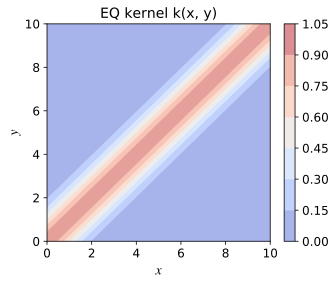

In [56]:
x = np.linspace(0, 10, 100)
scale, sigma = 1, 1
cov = exponentiated_quadratic(x, scale=scale, sigma=sigma)

xs, ys = np.meshgrid(x, x)
plt.figure(figsize=(5, 4))
plt.contourf(xs, ys, cov, cmap='coolwarm', alpha=0.5)
beautify_plot({'title': 'EQ kernel k(x, y)', 'x':'$x$', 'y': '$y$'})
plt.colorbar().set_clim(0, 1)
plt.show()

toggle_code()

This covariance has the same form as the 10-dimensional covariance function plotted earlier, except we have plotted it over a continuous range of $x$ and $y$ instead of $i$ and $j$. Try changing `scale` and `sigma` ($\ell$ and $\sigma$) to see how the covariance changes.

Although it is typically challenging to prove that a given covariance is positive-definite, it is much easier to construct new valid covariance functions from ones we already have. Here are some rules for constructing covariances from [Bishop](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf):


$$ \begin{align}
k(\mathbf{x}, \mathbf{x}') &= ck(\mathbf{x}, \mathbf{x}') & \text{scale by constant } c > 0\\
~\\
k(\mathbf{x}, \mathbf{x}') &= f(\mathbf{x})k(\mathbf{x}, \mathbf{x}')f(\mathbf{x}')& \text{multiplication by any function of arguments } f(\cdot)\\
~\\
k(\mathbf{x}, \mathbf{x}') &= q(k_1(\mathbf{x}, \mathbf{x}'))& \text{composition with polynomial $q(\cdot)$ with coefficients $> 0$}\\
~\\
k(\mathbf{x}, \mathbf{x}') &= \exp(k_1(\mathbf{x}, \mathbf{x}'))& \text{exponentiation}\\
~\\
k(\mathbf{x}, \mathbf{x}') &= k_1(\mathbf{x}, \mathbf{x}') + k_2(\mathbf{x}, \mathbf{x}')& \text{addition}\\
~\\
k(\mathbf{x}, \mathbf{x}') &= k_1(\mathbf{x}, \mathbf{x}')k_2(\mathbf{x}, \mathbf{x}')& \text{multiplication}\\
~\\
k(\mathbf{x}, \mathbf{x}') &= k_3(\boldsymbol{\phi}(\mathbf{x}), \boldsymbol{\phi}(\mathbf{x}'))& \text{mapping with $d$-dimensional features}\\
~\\
k(\mathbf{x}, \mathbf{x}') &= \mathbf{x}^T \mathbf{A} \mathbf{x}& \text{quadratic form using positive-definite $\mathbf{A}$}\\
~\\
k(\mathbf{x}, \mathbf{x}') &= k_a(\mathbf{x}_a, \mathbf{x}_a') + k_b(\mathbf{x}_b, \mathbf{x}_b')& \text{addition of partitioning kernels}\\
~\\
k(\mathbf{x}, \mathbf{x}') &= k_a(\mathbf{x}_a, \mathbf{x}_a')k_b(\mathbf{x}_b, \mathbf{x}_b')& \text{multiplication of partitioning kernels}\\
\end{align} $$

In rules above, $k_1$ and $k_2$ are covariance functions taking $n$-dimensional inputs. $k_3$ is a covariance taking $d$-dimensional inputs, $\boldsymbol{\phi}$ is any $d$-dimensional feature mapping of $\mathbf{x}$. Finally, $\mathbf{x}_a$ and $\mathbf{x}_b$ are variables (not necessarily disjoint), such that $\mathbf{x} = \{\mathbf{x}_a, \mathbf{x}_b\}$, while $k_a$ and $k_b$ are covariances defined over spaces of corresponding dimensions. You are encouraged to prove that each of the rules above holds - solutions are given below.


<details>
<summary>Proof of rules for combining covariance functions</summary>
<div>
    As a reminder, a matrix $\mathbf{M}$ is positive-definite if and only if $\mathbf{x}^\top\mathbf{M}\mathbf{x} > 0$ for any $\mathbf{x} \neq 0$.
    <br>
    <br>
    
    **Multiplication by a constant:** This is straightforward to show. Let $c > 0$, and $k_1$ be a valid covariance function. The matrix $\mathbf{M}_{ij} = k_1(\mathbf{x}_i, \mathbf{x}_j)$ is positive-definite by assumption so $c\mathbf{M}$ is also positive definite, and $ck_1$ is a valid covariance.
    
    <br>
    <br>
    
    **Multiplication by function of arguments:** Let $f(\mathbf{x})$ be any function, and define the diagonal matrix $\boldsymbol{\Phi} = \text{diag}(f(\mathbf{x}_1), f(\mathbf{x}_2), ..., f(\mathbf{x}_n))$. By assumption, $\mathbf{M}_{ij} = k_1(\mathbf{x}_i, \mathbf{x}_j)$ is positive definite. We have
    
    $$ \begin{align}
    \mathbf{M}' &= \boldsymbol{\Phi}\mathbf{M}\boldsymbol{\Phi}\\
    &= \boldsymbol{\Phi}\boldsymbol{\Phi}\mathbf{M}
    \end{align}$$
    
    because $\boldsymbol{\Phi}$ is diagonal so we can change the order of multiplication. Noting that $\boldsymbol{\Phi}\boldsymbol{\Phi}$ and $\mathbf{M}$ are both positive-definite matrices and using the fact that a product of positive definite matrices is also positive-definite (see rule for multiplication of covariances below), $\mathbf{M}'$ is also positive definite. But $\mathbf{M}'$ is noting more than
    
    $$ \begin{align}
    \mathbf{M}'_{ij} &= f(\mathbf{x}_i)\mathbf{M}_{ij}f(\mathbf{x}_j)
    \end{align}$$
    
    so we have arrived at the result.
    
    <br>
    <br>
    
    **Composition with positive-coefficient polynomial:**
    
    
    <br>
    <br>
    
    **Exponentiation:**
    
    <br>
    <br>
    
    **Addition:** Suppose $k_1$ and $k_2$ are covariance functions with associated covariance matrices $\mathbf{M}_1$ and $\mathbf{M}_2$. Then 
    
</div>
</details>